In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ch=pd.read_csv("Churn_Modelling.csv")

In [2]:
ch.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
ch.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
dp=ch.drop("RowNumber",axis=1,inplace=True)
dp=ch.drop("Surname",axis=1,inplace=True)
dp=ch.drop("CustomerId",axis=1,inplace=True)
dp

In [5]:
ch.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [6]:
ch.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
ch.select_dtypes("object")

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [8]:
ch["Exited"].unique()

array([1, 0], dtype=int64)

In [9]:
ch.value_counts()

CreditScore  Geography  Gender  Age  Tenure  Balance    NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
350          France     Female  40   0       111098.85  1              1          1               172321.21        1         1
695          France     Male    36   4       161533.00  1              1          0               100940.91        0         1
                        Female  36   2       0.00       2              0          1               167749.54        0         1
                                42   0       0.00       2              0          1               140724.64        0         1
                                     5       0.00       1              0          1               72172.13         1         1
                                                                                                                            ..
608          France     Male    42   5       0.00       2              1          0               178504.29        0

In [10]:
ch.drop("Geography",axis=1)
ch

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<AxesSubplot:>

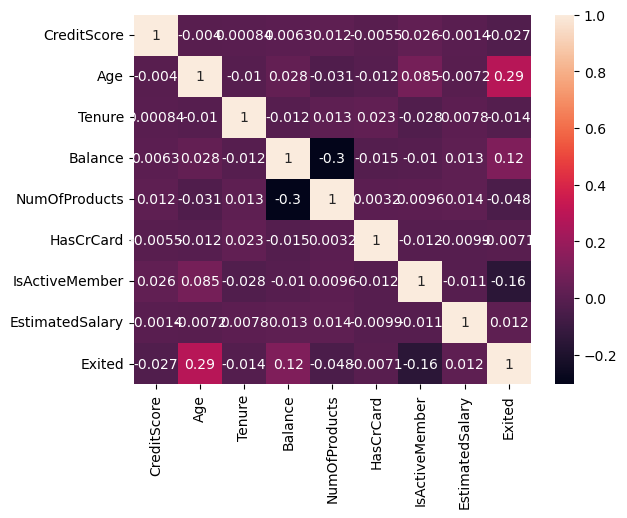

In [11]:
sns.heatmap(ch.corr(),annot=True)

0    7963
1    2037
Name: Exited, dtype: int64

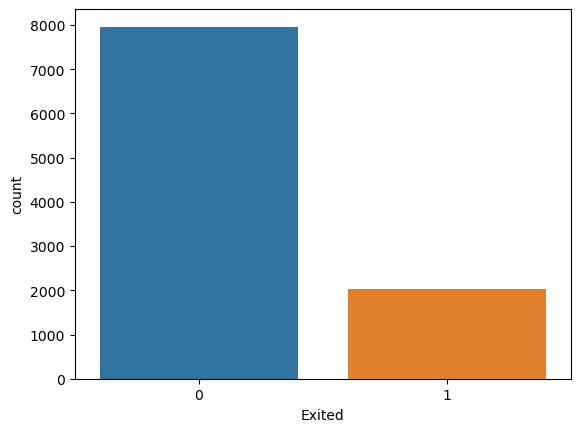

In [12]:
sns.countplot(x=ch.Exited)   #checking the exit rate  of the company
ch["Exited"].value_counts()

<AxesSubplot:xlabel='Exited', ylabel='Gender'>

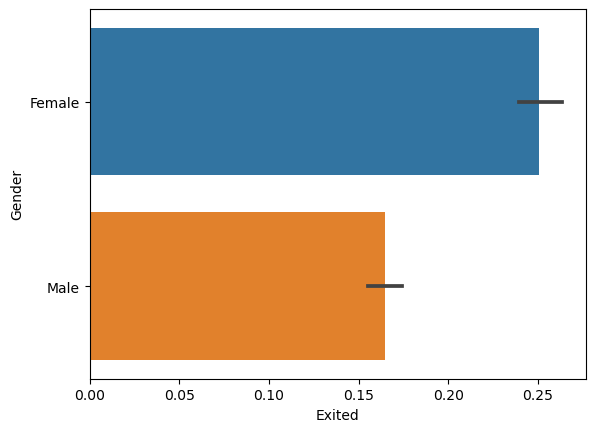

In [13]:
sns.barplot(data=ch,x="Exited",y="Gender")

<AxesSubplot:xlabel='Exited', ylabel='Age'>

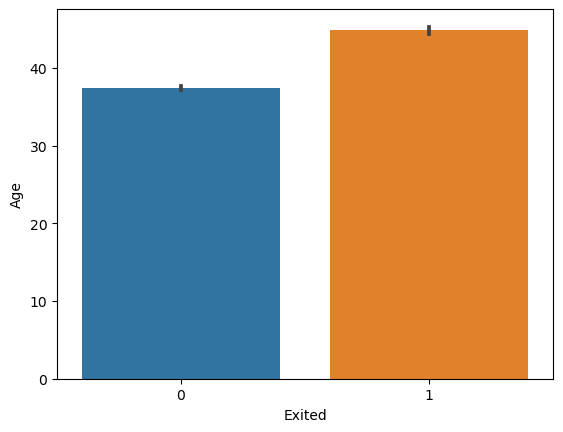

In [14]:
sns.barplot(data=ch,x="Exited",y="Age")

<AxesSubplot:xlabel='Exited', ylabel='Geography'>

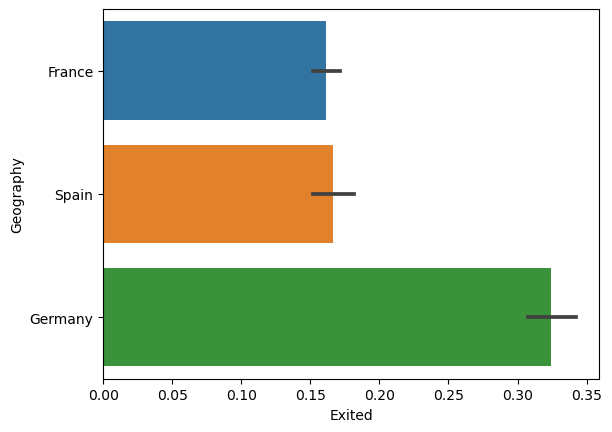

In [15]:
sns.barplot(data=ch,x="Exited",y="Geography")

<AxesSubplot:xlabel='Age'>

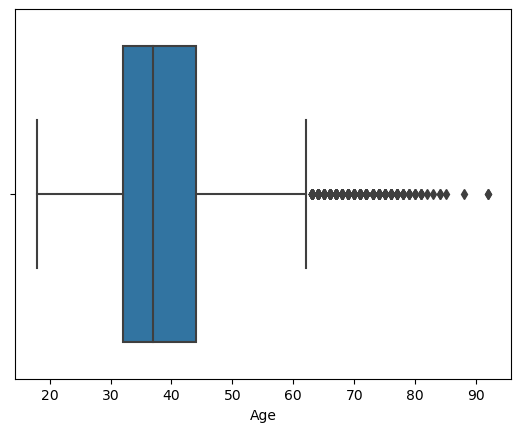

In [16]:
#checking for outliers
sns.boxplot(x=ch.Age)

<AxesSubplot:xlabel='Age'>

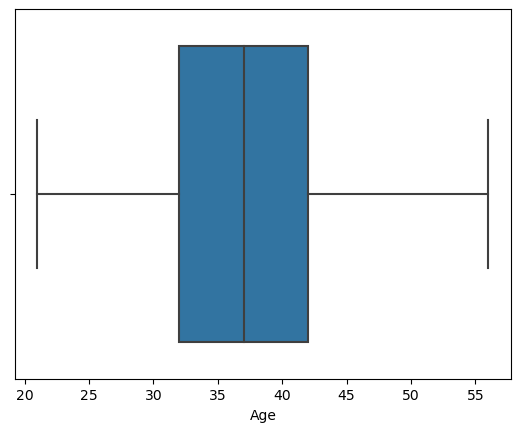

In [17]:
ch=ch[(ch.Age>20)&(ch.Age<57)] #removing outliers
sns.boxplot(x=ch.Age)

<AxesSubplot:xlabel='CreditScore'>

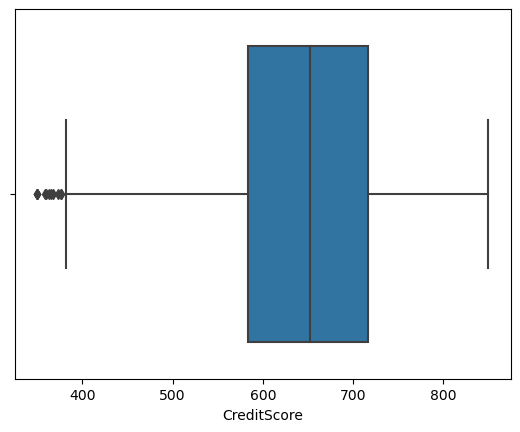

In [18]:
sns.boxplot(x=ch.CreditScore)

<AxesSubplot:xlabel='CreditScore'>

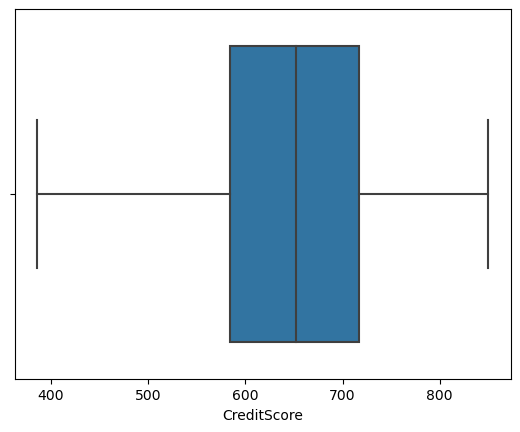

In [19]:
ch=ch[ch.CreditScore>385]
sns.boxplot(x=ch.CreditScore)

<AxesSubplot:xlabel='EstimatedSalary'>

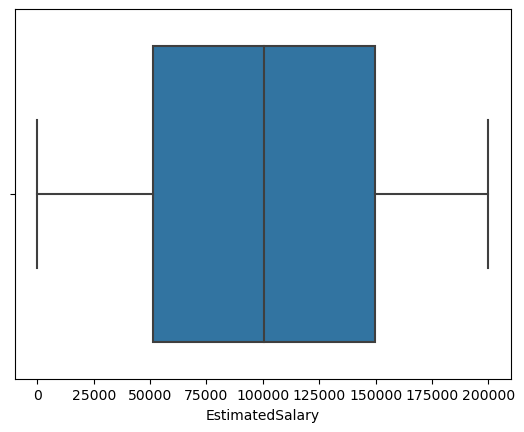

In [20]:
sns.boxplot(x=ch.EstimatedSalary)

<AxesSubplot:xlabel='Balance'>

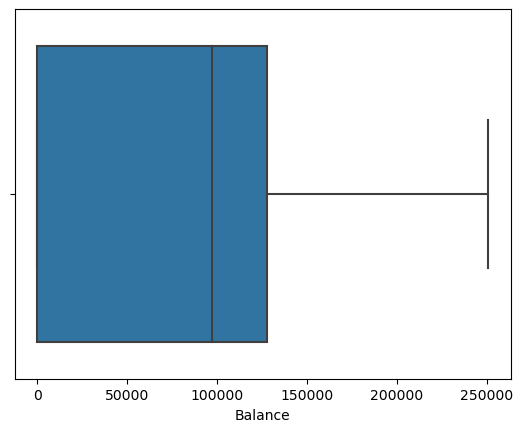

In [21]:
sns.boxplot(x=ch.Balance)

In [22]:
ch.select_dtypes("object")

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [23]:
# as we have only two categories in gender we go with label encoder male=0,female=1
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ch.Gender=le.fit_transform(ch.Gender)
y=ch.Gender
y
#alternate method
'''le.classes_
a=np.array(["Male","Female"])
a
le.transform(a)'''

'le.classes_\na=np.array(["Male","Female"])\na\nle.transform(a)'

In [24]:
#in this cell we need to encode the country using one hot encoding as we have more than one class
x=pd.get_dummies(ch.Geography)
x.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [25]:
x.shape

(9167, 3)

In [26]:
x

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [27]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 9167, dtype: int32

In [28]:
ch_new=pd.concat([ch,x],axis=1)
ch_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [29]:
ch_new=ch_new.drop("Geography",axis=1)
ch_new

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [34]:
a=ch_new.drop("Exited",axis=1)
b=ch_new["Exited"]
a.shape,b.shape

((9167, 12), (9167,))

In [35]:
from sklearn.model_selection import train_test_split
a1,a2,b1,b2=train_test_split(a,b,test_size=0.15,random_state=42,shuffle=False)
a1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8486,738,0,40,6,114940.67,2,1,1,194895.57,0,1,0
8487,706,1,34,0,140641.26,2,1,1,77271.91,0,1,0
8489,522,0,41,7,0.00,2,0,1,176780.39,1,0,0
8490,746,1,48,5,165282.42,1,1,0,153786.46,1,0,0


In [36]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
a1=scaler.fit_transform(a1)
a2=scaler.fit_transform(a2)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=2)
model.fit(a1,b1)

KNeighborsClassifier(n_neighbors=2)

In [38]:
model.score(a2,b2)*100

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


84.30232558139535

In [45]:
cred=[522,0,41,7,0.00,2,0,1,176780.39,1,0,0]
cred=np.array(cred).reshape(1,-1)
model.predict(cred)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0], dtype=int64)

In [49]:
cred=[850,0,43,2,125510.82,1,1,1,79084.10,0,0,1]
cred=np.array(cred).reshape(1,-1)
model.predict(cred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1], dtype=int64)